In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train= pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
print(train.shape)
print(test.shape)

train.head()

(88858, 10)
(59310, 9)


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [4]:
del train['ID']

In [5]:
train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
88853,3337,1,0,2,10,12.0,44,3,0
88854,3516,1,0,2,10,20.0,38,1,0
88855,3516,1,0,2,15,40.0,8,2,0
88856,3702,1,0,2,10,25.0,18,3,0


In [6]:
train['Crop_Damage'].nunique()

3

In [8]:
print(train["Crop_Damage"].value_counts().sort_index())

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  88858 non-null  int64  
 1   Crop_Type                88858 non-null  int64  
 2   Soil_Type                88858 non-null  int64  
 3   Pesticide_Use_Category   88858 non-null  int64  
 4   Number_Doses_Week        88858 non-null  int64  
 5   Number_Weeks_Used        79858 non-null  float64
 6   Number_Weeks_Quit        88858 non-null  int64  
 7   Season                   88858 non-null  int64  
 8   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 6.1 MB


In [66]:
#filled the missing values with 0
train['Number_Weeks_Used'].fillna(0,inplace=True)

Created two new features

In [9]:
train['insects per season']=train['Estimated_Insects_Count']/train['Season']
train['insect per pesticide']=train['Estimated_Insects_Count']/train['Pesticide_Use_Category']

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  88858 non-null  int64  
 1   Crop_Type                88858 non-null  int64  
 2   Soil_Type                88858 non-null  int64  
 3   Pesticide_Use_Category   88858 non-null  int64  
 4   Number_Doses_Week        88858 non-null  int64  
 5   Number_Weeks_Used        88858 non-null  float64
 6   Number_Weeks_Quit        88858 non-null  int64  
 7   Season                   88858 non-null  int64  
 8   Crop_Damage              88858 non-null  int64  
 9   insects per season       88858 non-null  float64
 10  insect per pesticide     88858 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 7.5 MB


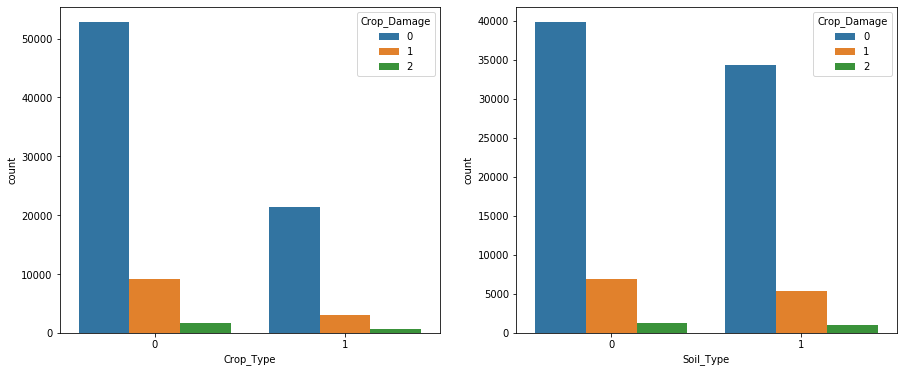

In [11]:
fig, ax = plt.subplots(1,2,figsize=(15,6),squeeze=False)
sns.countplot(x= train["Crop_Type"], hue=train["Crop_Damage"], ax=ax[0][0])
sns.countplot(x= train["Soil_Type"], hue=train["Crop_Damage"], ax=ax[0][1])

plt.show()

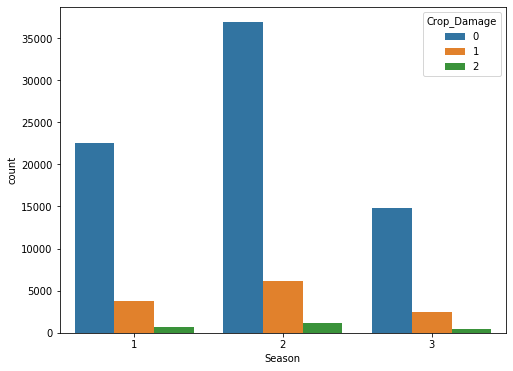

In [12]:
fig, ax = plt.subplots(1,figsize=(8,6),squeeze=False)
sns.countplot(x= train["Season"], hue=train["Crop_Damage"], ax=ax[0][0])

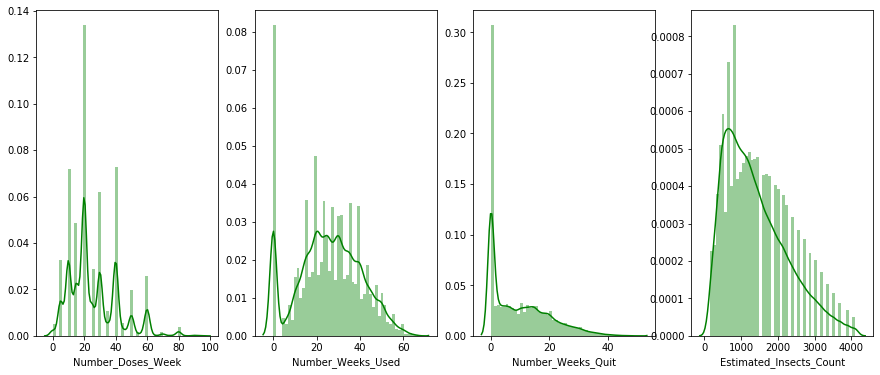

In [67]:
cols = ["Number_Doses_Week","Number_Weeks_Used","Number_Weeks_Quit","Estimated_Insects_Count"]
fig, ax = plt.subplots(1,4,figsize=(15,6),squeeze=False)
for i in np.arange(4):
    sns.distplot(train[cols[i]], ax=ax[0][i], color="green")
plt.show()

Since the data is skewed, we will try some tranformations on it.

In [13]:
train["Number_Doses_Week1"] =  np.abs(train["Number_Doses_Week"])
train["Number_Doses_Week1"] =  np.sqrt(train["Number_Doses_Week1"])

In [14]:
train["Number_Weeks_Quit1"] =  np.abs(train["Number_Weeks_Quit"])
train["Number_Weeks_Quit1"] =  np.sqrt(train["Number_Weeks_Quit1"])

In [15]:
train["Estimated_Insects_Count1"] =  np.abs(train["Estimated_Insects_Count"])
train["Estimated_Insects_Count1"] =  np.sqrt(train["Estimated_Insects_Count1"])

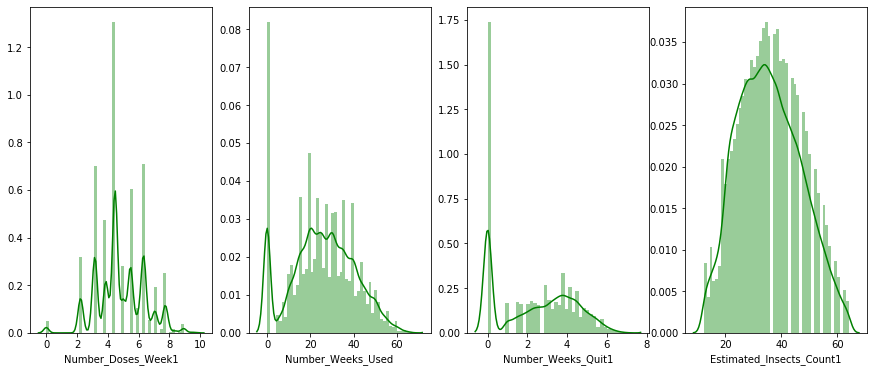

In [16]:
cols = ["Number_Doses_Week1","Number_Weeks_Used","Number_Weeks_Quit1","Estimated_Insects_Count1"]
fig, ax = plt.subplots(1,4,figsize=(15,6),squeeze=False)
for i in np.arange(4):
    sns.distplot(train[cols[i]], ax=ax[0][i], color="green")
plt.show()

In [18]:
df=train.copy()

In [19]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,insects per season,insect per pesticide,Number_Doses_Week1,Number_Weeks_Quit1,Estimated_Insects_Count1
0,188,1,0,1,0,0.0,0,1,0,188.0,188.0,0.0,0.0,13.711309
1,209,1,0,1,0,0.0,0,2,1,104.5,209.0,0.0,0.0,14.456832
2,257,1,0,1,0,0.0,0,2,1,128.5,257.0,0.0,0.0,16.031220
3,257,1,1,1,0,0.0,0,2,1,128.5,257.0,0.0,0.0,16.031220
4,342,1,0,1,0,0.0,0,2,1,171.0,342.0,0.0,0.0,18.493242


In [20]:
df=df.drop(['Number_Doses_Week','Number_Weeks_Quit'],axis=1)

In [21]:
del df["Estimated_Insects_Count"]

In [22]:
train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,insects per season,insect per pesticide,Number_Doses_Week1,Number_Weeks_Quit1,Estimated_Insects_Count1
0,188,1,0,1,0,0.0,0,1,0,188.0,188.0,0.0,0.0,13.711309
1,209,1,0,1,0,0.0,0,2,1,104.5,209.0,0.0,0.0,14.456832
2,257,1,0,1,0,0.0,0,2,1,128.5,257.0,0.0,0.0,16.031220
3,257,1,1,1,0,0.0,0,2,1,128.5,257.0,0.0,0.0,16.031220
4,342,1,0,1,0,0.0,0,2,1,171.0,342.0,0.0,0.0,18.493242


In [23]:
df

,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Weeks_Used,Season,Crop_Damage,insects per season,insect per pesticide,Number_Doses_Week1,Number_Weeks_Quit1,Estimated_Insects_Count1
0,1,0,1,0.0,1,0,188.000000,188.0,0.000000,0.000000,13.711309
1,1,0,1,0.0,2,1,104.500000,209.0,0.000000,0.000000,14.456832
2,1,0,1,0.0,2,1,128.500000,257.0,0.000000,0.000000,16.031220
3,1,1,1,0.0,2,1,128.500000,257.0,0.000000,0.000000,16.031220
4,1,0,1,0.0,2,1,171.000000,342.0,0.000000,0.000000,18.493242
...,...,...,...,...,...,...,...,...,...,...,...
88853,1,0,2,12.0,3,0,1112.333333,1668.5,3.162278,6.633250,57.766772
88854,1,0,2,20.0,1,0,3516.000000,1758.0,3.162278,6.164414,59.295868
88855,1,0,2,40.0,2,0,1758.000000,1758.0,3.872983,2.828427,59.295868
88856,1,0,2,25.0,3,0,1234.000000,1851.0,3.162278,4.242641,60.844063


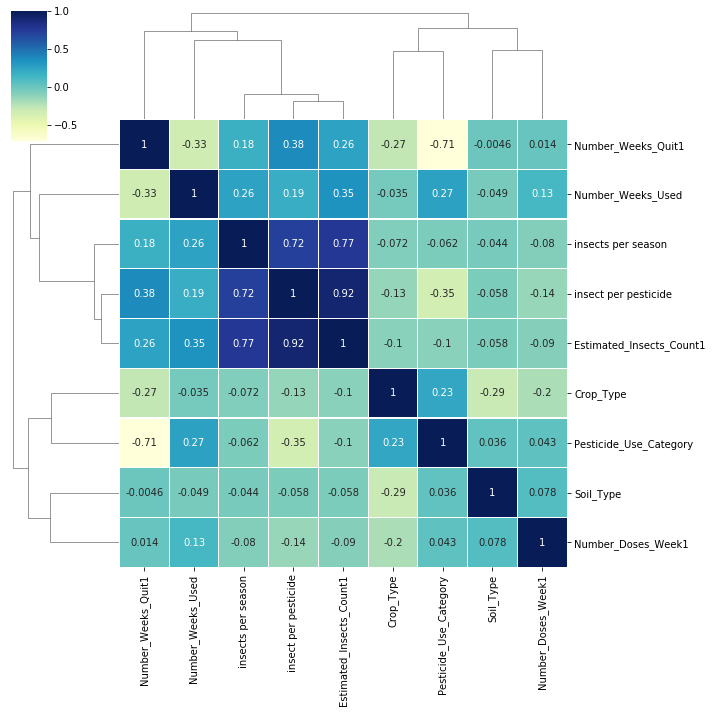

In [68]:
corrmat = df.corr()
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1,annot = True); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 

In [25]:
y=df['Crop_Damage']
X=df.drop(['Crop_Damage','Season'],axis=1)

In [26]:
X.shape


(88858, 9)

[0.0122374  0.0179385  0.05374841 0.31808523 0.09940589 0.06844938
 0.19737954 0.15918885 0.0735668 ]


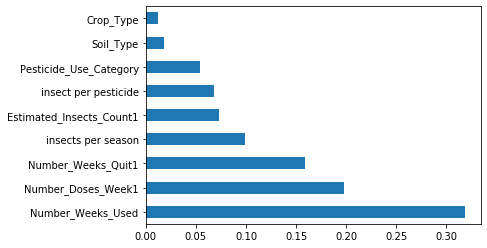

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [28]:
X

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Weeks_Used,insects per season,insect per pesticide,Number_Doses_Week1,Number_Weeks_Quit1,Estimated_Insects_Count1
0,188,1,0,1,0.0,188.000000,188.0,0.000000,0.000000,13.711309
1,209,1,0,1,0.0,104.500000,209.0,0.000000,0.000000,14.456832
2,257,1,0,1,0.0,128.500000,257.0,0.000000,0.000000,16.031220
3,257,1,1,1,0.0,128.500000,257.0,0.000000,0.000000,16.031220
4,342,1,0,1,0.0,171.000000,342.0,0.000000,0.000000,18.493242
...,...,...,...,...,...,...,...,...,...,...
88853,3337,1,0,2,12.0,1112.333333,1668.5,3.162278,6.633250,57.766772
88854,3516,1,0,2,20.0,3516.000000,1758.0,3.162278,6.164414,59.295868
88855,3516,1,0,2,40.0,1758.000000,1758.0,3.872983,2.828427,59.295868
88856,3702,1,0,2,25.0,1234.000000,1851.0,3.162278,4.242641,60.844063


In [29]:
#Scaling the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled=scaler.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, random_state=0,test_size=0.20)

In [31]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix

# XGB Classifier

In [33]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier(learning_rate=0.01, n_estimators=600,
                    silent=True, nthread=10)

In [34]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

grid = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=4, cv=3, verbose=3, random_state=1001 )

In [35]:
grid.fit(X_train, y_train)
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  6.5min finished


{'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 1, 'colsample_bytree': 0.8}
XGBClassifier(colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=5,
              min_child_weight=5, n_estimators=600, nthread=10,
              objective='multi:softprob', silent=True, subsample=0.8)


In [36]:
xgb = grid.best_estimator_

In [37]:
xgb.fit(X_train,y_train)

predictions = xgb.predict(X_test)

In [38]:
print ('accuracy score:', accuracy_score(y_test, predictions))  

accuracy score: 0.8458811613774476


# Random forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [57]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
predictions = rfc.predict(X_test)
print ('accuracy score:', accuracy_score(y_test, predictions))  

accuracy score: 0.8217420661715057


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 0)
n_estimators = [20,40,50,60,70,80,90,100]
max_depth = [3,5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15,25]
min_samples_leaf = [1, 2, 5,7, 10,15,20] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)
print(bestF.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(bestF.best_estimator_)

Fitting 3 folds for each of 1680 candidates, totalling 5040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 56.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 79.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 106.8min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 129.9min
[Parallel(n_jobs=-1)]: Done 5040 out of 5040 | elapsed: 131.2min finished


{'max_depth': 25, 'min_samples_leaf': 20, 'min_samples_split': 2, 'n_estimators': 80}
RandomForestClassifier(max_depth=25, min_samples_leaf=20, n_estimators=80,
                       random_state=0)


In [60]:
rf = bestF.best_estimator_                       
rf.fit(X_train, y_train)
prediction = rf.predict(X_test)

print ('accuracy score:', accuracy_score(y_test, prediction))  

accuracy score: 0.8452059419311276


# Light GBM Classifier

In [63]:
from lightgbm import LGBMClassifier
lg = LGBMClassifier()


lg.fit(X_train,y_train)
       
Y_predict=lg.predict(X_test)
print ('accuracy score:', accuracy_score(y_test,Y_predict)) 

accuracy score: 0.8479068197164078


Since we can see the LightGBM Classifier gives a better accuracy score we will use it for test dataset predictions.


In [40]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [41]:
df=test.copy()

In [42]:
del df['ID']

In [43]:
df['Number_Weeks_Used'].fillna(0,inplace=True)

In [44]:
df['insects per season']=df['Estimated_Insects_Count']/df['Season']
df['insect per pesticide']=df['Estimated_Insects_Count']/df['Pesticide_Use_Category']

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  59310 non-null  int64  
 1   Crop_Type                59310 non-null  int64  
 2   Soil_Type                59310 non-null  int64  
 3   Pesticide_Use_Category   59310 non-null  int64  
 4   Number_Doses_Week        59310 non-null  int64  
 5   Number_Weeks_Used        59310 non-null  float64
 6   Number_Weeks_Quit        59310 non-null  int64  
 7   Season                   59310 non-null  int64  
 8   insects per season       59310 non-null  float64
 9   insect per pesticide     59310 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 4.5 MB


In [46]:
df["Number_Doses_Week1"] =  np.abs(df["Number_Doses_Week"])
df["Number_Doses_Week1"] =  np.sqrt(df["Number_Doses_Week1"])

In [47]:
df["Number_Weeks_Quit1"] =  np.abs(df["Number_Weeks_Quit"])
df["Number_Weeks_Quit1"] =  np.sqrt(df["Number_Weeks_Quit1"])

In [48]:
df["Estimated_Insects_Count1"] =  np.abs(df["Estimated_Insects_Count"])
df["Estimated_Insects_Count1"] =  np.sqrt(df["Estimated_Insects_Count1"])

In [49]:
df=df.drop(['Number_Doses_Week','Number_Weeks_Quit'],axis=1)

In [50]:
del df["Estimated_Insects_Count"]

In [51]:
df.head()

,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Weeks_Used,Season,insects per season,insect per pesticide,Number_Doses_Week1,Number_Weeks_Quit1,Estimated_Insects_Count1
0,1,1,1,0.0,2,94.0,188.0,0.0,0.0,13.711309
1,1,1,1,0.0,2,205.0,410.0,0.0,0.0,20.248457
2,1,0,1,0.0,2,313.0,626.0,0.0,0.0,25.019992
3,1,0,1,0.0,2,365.5,731.0,0.0,0.0,27.037012
4,0,0,1,0.0,1,789.0,789.0,0.0,0.0,28.089144


In [52]:
del df['Season']

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled=scaler.fit_transform(df)

In [64]:
predictions=lg.predict(df_scaled)

In [65]:
id=pd.Series(test['ID'])
submission=pd.DataFrame({'ID':id,'Crop_Damage':predictions})
submission.to_csv("3.csv",index=False)